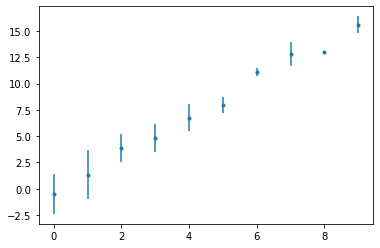

In [25]:
import numpy as np
import matplotlib.pyplot as plt

N_data = 10
noise = np.random.randn(N_data)
data = [np.arange(N_data),1.5*np.arange(N_data)+1.0+noise]
plt.errorbar(data[0],data[1],yerr=np.random.randn(N_data),fmt='.')

x = data[0]
ydata = data[1]

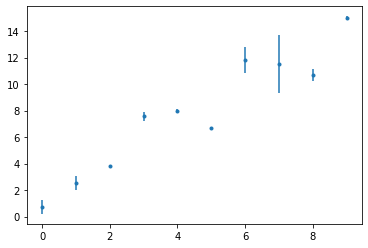

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pymultinest

N_data = 10
noise = np.random.randn(N_data)
data = [np.arange(N_data),1.5*np.arange(N_data)+1.0+noise]
plt.errorbar(data[0],data[1],yerr=np.random.randn(N_data),fmt='.')

x = data[0]
ydata = data[1]

def model(a, b):
    return  a*x+b

def prior(cube, ndim, nparams):
    cube[0] = 20*cube[0] - 10 # log-uniform prior between 10^-4 and 10^4
    cube[1] = 20*cube[1] - 10  # log-uniform prior between 10^-4 and 1


def loglike(cube, ndim, nparams):
    a, b = cube[0], cube[1]
    ymodel = model(a, b)
    loglikelihood = (-0.5 * ((ymodel - ydata) / noise)**2).sum()
    return loglikelihood

In [28]:
pymultinest.run(loglike, prior, 2, 
                outputfiles_basename='test_1_', resume = False, verbose = True)

In [33]:
a = pymultinest.Analyzer(outputfiles_basename='test_1_', n_params = 2)

  analysing data from test_1_.txt


In [40]:
a.get_stats()

{'modes': [{'index': 0,
   'strictly local log-evidence': -14.030610026602519,
   'strictly local log-evidence error': 0.022930425345745194,
   'local log-evidence': -14.030610026602519,
   'local log-evidence error': 0.022930425345745194,
   'mean': [1.5265093311867284, 0.8352852203530132],
   'sigma': [0.0501965721562175, 0.2510580632945374],
   'maximum': [1.5276057400123193, 0.8230807657772026],
   'maximum a posterior': [1.5274084662643972, 1.0152403467595477]}],
 'nested sampling global log-evidence': -14.152918561244382,
 'nested sampling global log-evidence error': 0.14477375201120113,
 'global evidence': -14.030610026602519,
 'global evidence error': 0.022930425345745194,
 'nested importance sampling global log-evidence': -14.030610026602519,
 'nested importance sampling global log-evidence error': 0.022930425345745194,
 'marginals': [{'median': 1.5257294894062041,
   'sigma': 0.05074280866115555,
   '1sigma': [1.477149721978014, 1.5786353393003252],
   '2sigma': [1.4313873751

In [44]:
params = a.get_stats()['modes'][0]['mean']

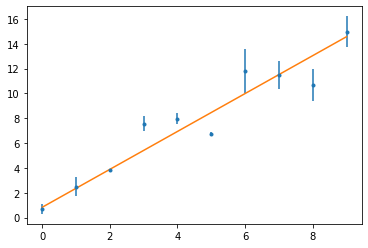

In [48]:
plt.errorbar(data[0],data[1],yerr=np.random.randn(N_data),fmt='.')
plt.plot(x,model(params[0],params[1]))